In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv("C:/Users/LENOVO/Desktop/Telco_Cust_Churn.csv")

In [12]:
print(data.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [13]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges']. median())

##kind of encoding is done
#converting to binary format

data['Churn'] = data['Churn'].map({'Yes': 1, 'No':0 })

#onehot encoding method
#assignning the numeric value for each feature set
data = pd.get_dummies(data, columns=['Contract', 'PaymentMethod'], drop_first=True)

#standadizing 
#NORMALIZING
#transform the columns
scaler = MinMaxScaler()
data[['MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(data[['MonthlyCharges', 'TotalCharges']])

#split the data into feature and target
X = data.drop('Churn', axis = 1)
y = data['Churn']

In [21]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the dataset
file_path = "C:/Users/LENOVO/Desktop/Telco_Cust_Churn.csv"
data = pd.read_csv(file_path)

# Check the columns and data
print(f"Columns in the dataset: {data.columns}")
print(f"First few rows:\n{data.head()}")

# Specify the target column
target_column = 'Churn'  # Make sure this matches the name of your target column in the dataset

# Features and target variable
X = data.drop(columns=[target_column])
y = data[target_column]

# Check for null values
print(f"Null values in X: {X.isnull().sum()}")
print(f"Null values in y: {y.isnull().sum()}")

# Preprocessing: Handling categorical and numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Apply preprocessing to the features
X_processed = preprocessor.fit_transform(X)

# Initialize the decision tree model
max_depth_range = range(1, 11)
cross_val_scores_list = []

# Perform cross-validation for different max_depth values
for depth in max_depth_range:
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(dt_model, X_processed, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cross_val_scores_list.append(scores.mean())

# Determine the optimal max_depth
optimal_depth = max_depth_range[cross_val_scores_list.index(max(cross_val_scores_list))]
print(f"Optimal max_depth: {optimal_depth}")



Columns in the dataset: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
First few rows:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service   

In [ ]:
#Decision tree algorithm and the prunning technique is used here. For the missing data values , the median is been replaced. Then after training the max_depth_range is taken and printed as the output to this extent.


In [ ]:
#pruning for the reducing the cost complexity

pruned_tree = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
pruned_tree.fit(X,y)

#Apply post-prunnig using the cost-complexity prunning
path = pruned_tree.cost_complexity_pruning_path(X,y)
ccp_alphas = path.ccp_alphas


#Find the best alpha using cross- validation
best_alpha = ccp_alphas[np.argmax(cross_val_score(DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alphas[i]),X,y,cv=5).mean() for i in range())]

final_model = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=42)
#cv means the cross validation - 5 fold cross validation.

final_model.fit(X,y)


ValueError: could not convert string to float: '7590-VHVEG'

In [25]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Train the initial decision tree with optimal depth
pruned_tree = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
pruned_tree.fit(X, y)

# Obtain the cost-complexity pruning path
path = pruned_tree.cost_complexity_pruning_path(X, y)
ccp_alphas = path.ccp_alphas

# Initialize variables to store the best alpha and its corresponding score
best_alpha = 0
best_score = 0

# Find the best alpha using cross-validation
for alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score = mean_score
        best_alpha = alpha

# Train the final model with the best alpha
final_model = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=42)
final_model.fit(X, y)

# Output the best alpha and final model score
print(f"Best ccp_alpha: {best_alpha}")
print(f"Best cross-validated accuracy: {best_score}")


ValueError: could not convert string to float: '7590-VHVEG'

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
# Load the dataset
data = pd.read_csv("C:/Users/LENOVO/Desktop/Telco_Cust_Churn.csv")

# Handle missing and incorrect values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')  # Convert to numeric
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())  # Fill missing values

# Encode the target variable
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

# One-hot encode categorical variables
data = pd.get_dummies(data, columns=['Contract', 'PaymentMethod'], drop_first=True)

# Normalize numerical features
scaler = MinMaxScaler()
data[['MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(data[['MonthlyCharges', 'TotalCharges']])

# Split features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Validate the dataset
print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")
print(f"Null values in X: {X.isnull().sum().sum()}, Null values in y: {y.isnull().sum()}")
print("Data types:\n", X.dtypes)

# Ensure all features are numeric
if not all(X.dtypes.apply(lambda x: np.issubdtype(x, np.number))):
    raise ValueError("Non-numeric columns found in X. Ensure encoding is complete.")

# Ensure shapes match
if X.shape[0] != y.shape[0]:
    raise ValueError("Mismatch in the number of samples between X and y.")

# Initialize and find the optimal max_depth
max_depth_range = range(1, 11)
cross_val_scores = []

for depth in max_depth_range:
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cross_val_scores.append(scores.mean())

optimal_depth = max_depth_range[np.argmax(cross_val_scores)]
print(f"Optimal max_depth: {optimal_depth}")

# Train the pruned decision tree
pruned_tree = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
pruned_tree.fit(X, y)

# Apply cost-complexity pruning
path = pruned_tree.cost_complexity_pruning_path(X, y)
ccp_alphas = path.ccp_alphas

# Find the best ccp_alpha using cross-validation
best_alpha = None
best_score = -np.inf
for alpha in ccp_alphas:
    temp_model = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    score = cross_val_score(temp_model, X, y, cv=5).mean()
    if score > best_score:
        best_score = score
        best_alpha = alpha

print(f"Best alpha: {best_alpha}, Best cross-validation score: {best_score}")

# Train the final model with the best alpha
final_model = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=42)
final_model.fit(X, y)

# Evaluate the model
print(f"Final Model Accuracy on Training Data: {final_model.score(X, y):.4f}")


X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

y_pred = final_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print (f"Accuracy {accuracy:.2f}" )
print (f"precision {precision:.2f}" )
print (f"recall {recall:.2f}" )
print (f"f1score {f1:.2f}" )


Shape of X: (7043, 23), Shape of y: (7043,)
Null values in X: 0, Null values in y: 0
Data types:
 customerID                                object
gender                                    object
SeniorCitizen                              int64
Partner                                   object
Dependents                                object
tenure                                     int64
PhoneService                              object
MultipleLines                             object
InternetService                           object
OnlineSecurity                            object
OnlineBackup                              object
DeviceProtection                          object
TechSupport                               object
StreamingTV                               object
StreamingMovies                           object
PaperlessBilling                          object
MonthlyCharges                           float64
TotalCharges                             float64
Contract_One year   

ValueError: Non-numeric columns found in X. Ensure encoding is complete.

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
data = pd.read_csv("C:/Users/LENOVO/Desktop/Telco_Cust_Churn.csv")

# Handle missing or invalid data
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

# Encode the target column
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

# One-hot encoding for categorical columns
data = pd.get_dummies(data, columns=['Contract', 'PaymentMethod'], drop_first=True)

# Normalize numerical columns
scaler = MinMaxScaler()
data[['MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(data[['MonthlyCharges', 'TotalCharges']])

# Split data into features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Ensure all features are numeric
non_numeric_cols = X.select_dtypes(include=['object']).columns
if len(non_numeric_cols) > 0:
    print(f"Non-numeric columns detected: {non_numeric_cols}")
    # Apply one-hot encoding to these columns
    X = pd.get_dummies(X, columns=non_numeric_cols, drop_first=True)

# Validate the shapes of X and y
print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")
print(f"Null values in X: {X.isnull().sum().sum()}, Null values in y: {y.isnull().sum()}")

# Decision Tree with Cross-Validation for Optimal Depth
max_depth_range = range(1, 11)
cross_val_scores = []

for depth in max_depth_range:
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cross_val_scores.append(scores.mean())

# Determine the optimal max_depth
optimal_depth = max_depth_range[np.argmax(cross_val_scores)]
print(f"Optimal max_depth: {optimal_depth}")

# Pruned Decision Tree
pruned_tree = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
pruned_tree.fit(X, y)

# Apply post-pruning using cost-complexity pruning
path = pruned_tree.cost_complexity_pruning_path(X, y)
ccp_alphas = path.ccp_alphas

# Find the best alpha using cross-validation
best_alpha = None
best_score = -np.inf

for alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    score = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()
    if score > best_score:
        best_alpha = alpha
        best_score = score

print(f"Best alpha: {best_alpha}, Cross-validated accuracy: {best_score}")

# Final pruned model
final_model = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=42)
final_model.fit(X, y)

# Model Summary
print(f"Final model depth: {final_model.get_depth()}")
print(f"Final model leaves: {final_model.get_n_leaves()}")




Non-numeric columns detected: Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling'],
      dtype='object')
Shape of X: (7043, 7072), Shape of y: (7043,)
Null values in X: 0, Null values in y: 0
Optimal max_depth: 6
Best alpha: 0.0005705811470400422, Cross-validated accuracy: 0.7925598022453062
Final model depth: 8
Final model leaves: 34


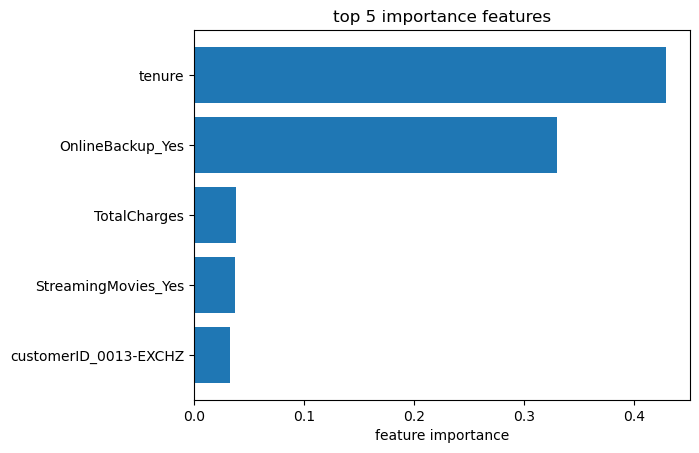

In [32]:
import matplotlib.pyplot as plt

importances = final_model.feature_importances_
indices = np.argsort(importances)[-5:]
features = X.columns[indices]

plt.barh(features,importances[indices])
plt.xlabel("feature importance")
plt.title("top 5 importance features")
plt.show()


In [33]:
pip install pandas scikit-learn matplotlib shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/82/29/923869e92c74bf07ec2b9a52ad5ac67d4184c873ba33ada7d4584356463a/shap-0.46.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for slicer==0.0.8 from https://files.pythonhosted.org/packages/63/81/9ef641ff4e12cbcca30e54e72fb0951a2ba195d0cda0ba4100e532d929db/slicer-0.0.8-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
   - ------------------------------------- 20.5/456.1 kB 330.3 kB/s eta 0:00:02
   - ------------------------------------- 20.5/456.1 kB 330.3 kB/s eta 0:00:02
   ---- ---------------------------------- 51.2/456.1 kB 327.7 kB/s eta 0:00:02
   ----------- -------------------------- 133.1/456.1 kB 605.3 kB/s eta 0:00:01
   ------------------- ------------------ 235.5/456.1 kB 901.1 kB/s eta 0:00:01
   ---------------------------- ----------- 327.7/456.1 kB 1.0 MB/s eta 0:00:01
   ---------------------------------------

In [ ]:

import shap
import matplotlib.pyplot as plt

# Assuming `final_model` and `X_test` are defined and trained.
explainer = shap.TreeExplainer(final_model)

# Correct variable assignment
shap_values = explainer.shap_values(X_test)

# Generate the SHAP summaryy plot
shap.summary_plot(shap_values, X_test, max_display=len(X_test.columns))


NameError: name 'final_model' is not defined